In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib import cm as cm 
from PIL import Image
import scipy.spatial
import random
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import PIL
import math

In [2]:
def line_enhancement_and_blur(imgBase, imgBody, edgeMethod="laplacian",kernelSize = 5, alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else:
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)
        
    blur = cv2.blur(edgeImg,(kernelSize,kernelSize),0)
    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(blur)+beta*(imgBody))
    dst = cv2.applyColorMap(dst,cv2.COLORMAP_JET)
   # plt.subplot(121), plt.imshow(dst)
    return dst

In [3]:
def colourise_base_and_blur(imgBase, imgBody, edgeMethod="laplacian",kernelSize = 5, alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else :
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)
    
    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    edgeImg = cv2.applyColorMap(edgeImg,cv2.COLORMAP_HSV)
    blur = cv2.blur(edgeImg,(kernelSize,kernelSize),0)
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(blur)+beta*(imgBody))
    #plt.subplot(121), plt.imshow(dst)
    return dst

In [4]:
def line_enhancement(imgBase, imgBody, edgeMethod="laplacian",alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else:
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)

    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))

    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(edgeImg)+beta*(imgBody))
#     dst = cv2.applyColorMap(dst,cv2.COLORMAP_RAINBOW)
    #plt.subplot(121), plt.imshow(dst)
    return dst

In [5]:
def colourise_base(imgBase, imgBody, edgeMethod = "laplacian",alpha = 0.1):
    if(edgeMethod == "laplacian"):
        edgeImg = cv2.Laplacian(imgBase,cv2.CV_8U)
    if(edgeMethod == "sobelX"):
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,1,0,ksize=5)
    else:
        edgeImg = cv2.Sobel(imgBase,cv2.CV_8U,0,1,ksize=5)

    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    edgeImg = cv2.applyColorMap(edgeImg,cv2.COLORMAP_HSV)
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(edgeImg)+beta*(imgBody))
    #plt.subplot(121), plt.imshow(dst)
    return dst

In [6]:
def sensitive_canny(imgBase, imgBody, minThresh = 10,maxThresh = 50, alpha = 0.1):
        
    edgeImg = cv2.Canny(imgBase,minThresh,maxThresh)
    edgeImg = cv2.cvtColor(edgeImg,cv2.COLOR_GRAY2RGB)
    height, width = imgBase.shape[:2]
    imgBody =cv2.resize(imgBody,(width,height))
    
    beta=1-alpha
    gamma=0
    dst = np.uint8(alpha*(edgeImg)+beta*(imgBody))
#     dst = cv2.applyColorMap(dst,cv2.COLORMAP_JET)
 #   plt.subplot(121), plt.imshow(dst)
    return dst

In [7]:
def erosion_dilation(img, kernelSize = 5, kernelShape = "circle"):
    if (kernelShape == "circle"):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(kernelSize,kernelSize))
    if (kernelShape == "rectangle"):
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(kernelSize,kernelSize))
    else:
        kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(kernelSize, kernelSize))
    dst = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    return dst

In [8]:
def createDSIPT(imgBase, imgBody,iterations = 2, alpha=0.1):
    outline = erosion_dilation(imgBase)
    height, width = imgBase.shape[:2]
    outline =cv2.resize(outline,(width,height))
    outlineAlpha = 0.2
    output = colourise_base_and_blur(imgBase,imgBody,alpha) 
    for i in range(1,iterations):
        output = line_enhancement(imgBase,output,"laplacian")
        output = sensitive_canny(imgBase,output,alpha)
        output = line_enhancement(imgBase,output,alpha)
    output = colourise_base(imgBase,output)
    output = np.uint8(outlineAlpha*outline+ (1-outlineAlpha)*output)
    return output

True

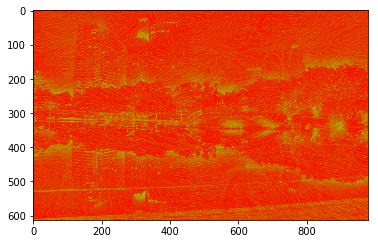

In [19]:
img1 = cv2.imread("Strong-Lines-San-Francisco.jpg")
img2 = cv2.imread("flowers.jpg")
imgBase = cv2.imread("starry-night.jpg")
imgBody = cv2.imread("aerial_silks.jpg")
imgBase2 = cv2.imread("sunset_style.jpg")
imgBase3 = cv2.imread("twilight_style.jpg")
deepDreamBase = cv2.imread("baseDeepDream1.jpg")
deepDreamBody = cv2.imread("bodyDeepDream1.jpg")
output = createDSIPT(imgBase3,deepDreamBody,2)
plt.imshow(output)
cv2.imwrite("DSIPT_Output-7.png",output)